In [1]:
pip install git+https://www.github.com/keras-team/keras-contrib.git

Note: you may need to restart the kernel to use updated packages.


'C:\Users\T' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2

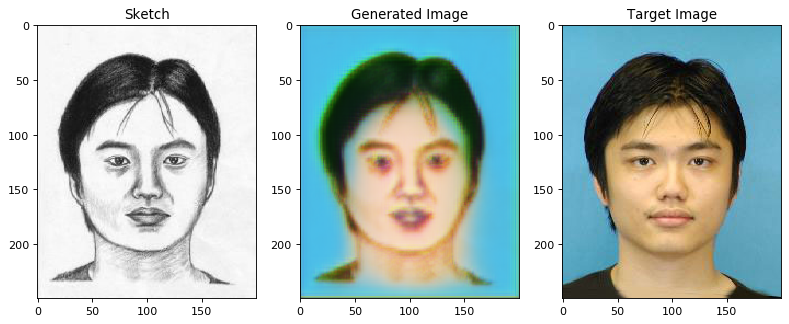

In [8]:
# Load Model
g_model = load_model('Models/g_model1.h5',custom_objects={'InstanceNormalization':InstanceNormalization})

# load and resize the image
img = load_img('Dataset/CUHK/Testing sketch/m1-001-01-sz1.jpg', target_size=(256, 256))
target = cv2.cvtColor(cv2.imread('Dataset/CUHK/Testing photo/m1-001-01.jpg'), cv2.COLOR_BGR2RGB)

# convert to numpy array
img = img_to_array(img)
norm_img = (img.copy() - 127.5) / 127.5

g_img = g_model.predict(np.expand_dims(norm_img, 0))[0]
g_img = g_img * 127.5 + 127.5

img = cv2.resize(img, (200, 250))
g_img = cv2.resize(g_img, (200, 250))

f = plt.figure(num=None, figsize=(12, 6), dpi=80)
ax1 = f.add_subplot(1,3, 1)
plt.imshow(img.astype('uint8'))
ax2 = f.add_subplot(1,3, 2)
plt.imshow(g_img.astype('uint8'))
ax3 = f.add_subplot(1,3, 3)
plt.imshow(target.astype('uint8'))
ax1.set_title('Sketch')
ax2.set_title('Generated Image')
ax3.set_title('Target Image')

plt.show(block=True)

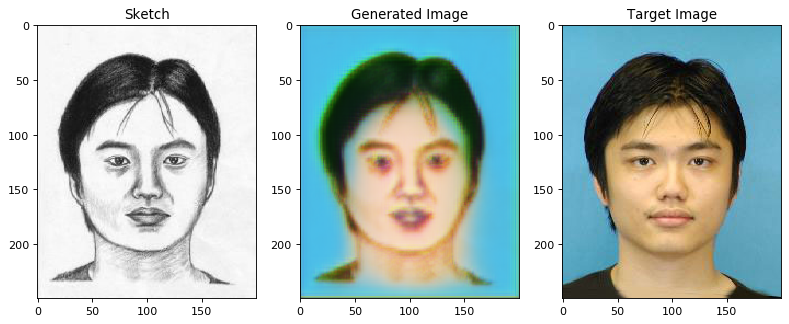

In [9]:

def generate_and_display_images(generator_model_path, sketch_image_path, target_image_path):
    # Load model
    g_model = load_model(generator_model_path, custom_objects={'InstanceNormalization': InstanceNormalization})

    # Load and resize the sketch image
    img = load_img(sketch_image_path, target_size=(256, 256))
    target = cv2.cvtColor(cv2.imread(target_image_path), cv2.COLOR_BGR2RGB)

    # Convert to numpy array
    img = img_to_array(img)
    norm_img = (img.copy() - 127.5) / 127.5

    g_img = g_model.predict(np.expand_dims(norm_img, 0))[0]
    g_img = g_img * 127.5 + 127.5

    img = cv2.resize(img, (200, 250))
    g_img = cv2.resize(g_img, (200, 250))

    f = plt.figure(num=None, figsize=(12, 6), dpi=80)
    ax1 = f.add_subplot(1, 3, 1)
    plt.imshow(img.astype('uint8'))
    ax2 = f.add_subplot(1, 3, 2)
    plt.imshow(g_img.astype('uint8'))
    ax3 = f.add_subplot(1, 3, 3)
    plt.imshow(target.astype('uint8'))
    ax1.set_title('Sketch')
    ax2.set_title('Generated Image')
    ax3.set_title('Target Image')

    plt.show(block=True)

# Usage:
generate_and_display_images('Models/g_model1.h5', 'Dataset/CUHK/Testing sketch/m1-001-01-sz1.jpg', 'Dataset/CUHK/Testing photo/m1-001-01.jpg')


In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Generator Model
g_model = load_model('Models/g_model1.h5', custom_objects={'InstanceNormalization': InstanceNormalization})

# Load Discriminator Model
d_model = load_model('Models/d_model1.h5', custom_objects={'InstanceNormalization': InstanceNormalization})

# Load and preprocess the sketch image
sketch_img = load_img('Dataset/CUHK/Testing sketch/m1-001-01-sz1.jpg', target_size=(256, 256))
sketch_array = img_to_array(sketch_img)
normalized_sketch = (sketch_array - 127.5) / 127.5  # Normalize the sketch image

# Generate the image using the Generator Model
generated_image = g_model.predict(np.expand_dims(normalized_sketch, 0))[0]
generated_image = (generated_image * 127.5 + 127.5).astype('uint8')  # Convert back to uint8

# Load and preprocess the target image
target_image = cv2.cvtColor(cv2.imread('Dataset/CUHK/Testing photo/m1-001-01.jpg'), cv2.COLOR_BGR2RGB)
target_image = cv2.resize(target_image, (256, 256))  # Resize the target image to match the generated image size

# Discriminate the generated image and target image using the Discriminator Model separately
prediction_gen = d_model.predict([np.expand_dims(generated_image, 0), np.expand_dims(generated_image, 0)])[0]
prediction_target = d_model.predict([np.expand_dims(target_image, 0), np.expand_dims(target_image, 0)])[0]

# Display the images and prediction results
f = plt.figure(num=None, figsize=(12, 6), dpi=80)
ax1 = f.add_subplot(1, 3, 1)
ax1.imshow(sketch_img)
ax1.set_title('Sketch')

ax2 = f.add_subplot(1, 3, 2)
ax2.imshow(generated_image)
ax2.set_title('Generated Image')

ax3 = f.add_subplot(1, 3, 3)
ax3.imshow(target_image)
ax3.set_title('Target Image')

plt.show(block=True)

print(f"Discriminator Prediction for the Generated Image: {prediction_gen}")
print(f"Discriminator Prediction for the Target Image: {prediction_target}")


C:\Users\T PRUTHVIRAJ SINGH\miniconda3\envs\gan\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '
